# Performing  Dimensionality reduction using PCA
reference [kaggle](https://www.kaggle.com/code/faressayah/support-vector-machine-pca-tutorial-for-beginner?scriptVersionId=117969614)
[PCA](https://www.geeksforgeeks.org/reduce-data-dimentionality-using-pca-python/)

In [2]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler # standardises features
from sklearn.decomposition import PCA
import seaborn as sns 

In [5]:
df = pd.read_csv('traindata.txt', sep=",")

#Standardising the features.
scalar = StandardScaler()
scaled_df = pd.DataFrame(scalar.fit_transform(df))
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,-0.281049,-0.488966,-1.249831,-0.488926,1.184889,0.789635,-0.085204,-1.041278,-0.407156,-0.180475,...,-0.961084,1.908441,-1.200404,0.448267,-0.538920,-0.516551,0.532850,-0.175127,1.212074,1.207032
1,1.350512,-1.944728,-0.016577,-0.891654,-1.284206,-0.730166,0.520192,-2.656598,0.469625,-0.691849,...,0.924704,0.214236,-0.657242,0.448267,-0.889015,-1.210817,-1.202305,0.172796,1.212074,-0.018756
2,-1.985938,-0.814372,1.529592,1.799301,-0.755114,0.012062,1.198969,1.082233,-0.037985,-1.431996,...,0.610406,1.270837,0.791192,-1.347135,-0.538920,-1.210817,0.185819,-0.523051,-0.007685,-0.018756
3,0.323912,1.566228,0.020237,0.609423,1.079070,-0.288363,-0.433766,-0.478638,0.131218,-0.072818,...,1.301861,-2.226875,0.682559,-1.347135,0.511365,0.871981,0.532850,0.172796,1.212074,-1.244544
4,-0.354377,-0.163560,-0.053390,0.151778,0.426524,1.461174,2.318035,1.445226,1.438699,2.618624,...,-1.573965,1.252620,-0.222712,1.345968,1.211554,-1.557950,-1.549336,0.868643,1.212074,1.207032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.399310,-0.643105,-0.163831,-2.099838,-0.702205,0.824979,1.896092,0.918886,0.700357,1.811192,...,-0.913939,-1.589272,-0.349450,-0.449434,1.211554,-0.863684,-1.549336,1.564491,-1.227445,-0.018756
9995,-0.941006,0.076213,-0.016577,-1.825250,-1.019660,-0.712494,0.758681,-2.003210,0.992617,0.774987,...,0.406112,0.505712,-0.476188,-1.347135,1.561649,-0.863684,-1.549336,1.564491,-0.007685,-1.244544
9996,1.093862,-0.334826,-0.624000,-0.086198,1.625799,-0.429740,0.666955,-1.095727,-1.668491,0.034840,...,0.091814,-0.969885,-1.200404,1.345968,0.861460,-0.516551,-0.508243,-0.870975,-1.227445,1.207032
9997,-0.006067,-1.276790,1.382338,-0.012975,0.338342,-0.394396,-1.075852,0.664791,-0.099514,-0.853336,...,-0.269629,-0.059023,1.352460,0.448267,-0.538920,1.219114,-1.202305,0.172796,-0.007685,-1.244544


<Axes: >

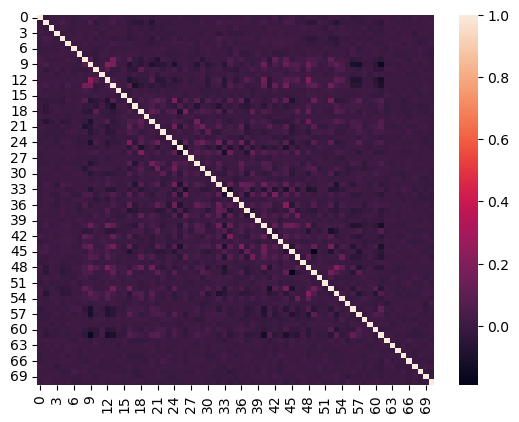

In [6]:
#DO NO INCLUDE IN SOLUTION JUST CHECKING CORRELATION WITH SNS
sns.heatmap(scaled_df.corr())

In [8]:
# Applying PCA
# Using Components : 3

pca = PCA(n_components=3)
pca.fit(scaled_df)
data_pca = pca.transform(scaled_df)
data_pca = pd.DataFrame(data_pca, columns = ['PC1', 'PC2', 'PC3'])
data_pca.head()

,PC1,PC2,PC3
0,0.252489,0.400414,1.444660
1,1.727545,0.776251,0.045346
2,-0.079376,-1.704029,1.155865
3,-0.973860,1.755515,-0.749810
4,1.608047,-2.055955,-0.353546


<Axes: >

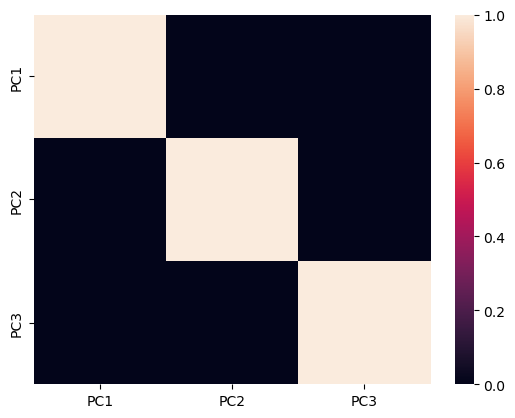

In [9]:
# Checking the correlation between features after PCA
sns.heatmap(data_pca.corr())

In [11]:
# Model Training SVM
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = pd.read_csv("traindata.txt", sep=",")
y = pd.read_csv("trainlabels.txt")
print(f'X shape : {X.shape}')
print(f'y shape : {y.shape} ')

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42)

X shape : (9999, 71)
y shape : (9999, 1) 


In [13]:
# Accuracy Score function

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Polynomial Kernel SVM

In [20]:
from sklearn.svm import SVC 

# hyperparam coef0 controls how much the model is influenced by high degree polynomials
model = SVC(kernel='poly', degree = 2, gamma='auto', coef0=1, C=6 )
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

/home/haize/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Result:
Accuracy Score: 99.81%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3           4   
precision    0.997279    0.997179    0.995665    0.997368    1.000000  \
recall       1.000000    0.997179    0.995665    0.997368    0.996988   
f1-score     0.998638    0.997179    0.995665    0.997368    0.998492   
support    733.000000  709.000000  692.000000  760.000000  664.000000   

                    5           6           7           8           9   
precision    0.998501    1.000000    0.998544    0.998597    0.998561  \
recall       1.000000    0.998529    1.000000    0.997199    0.998561   
f1-score     0.999250    0.999264    0.999272    0.997898    0.998561   
support    666.000000  680.000000  686.000000  714.000000  695.000000   

           accuracy    macro avg  weighted avg  
precision  0.998143     0.998169      0.998144  
recall     0.998143     0.998149      0.998143  
f1-score   0.